In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import math
import matplotlib.pyplot as plt
import os


In [8]:

curr_file = "/Users/Kristen/Desktop/06042017/Cdc24_Bem1_Mutants.csv"

data = pd.read_csv(curr_file)
data["Cdc24"].dropna()

def from_rads_get_pol(df, name):
    rads = np.asarray(df[name])
    pol_eff = []
    for r in rads:
        pol = 1-2*(np.mean(r)/np.pi)
        pol_eff.append(pol)
    return pol_eff

def find_ave_sem(pol):
    std = np.std(np.asarray(pol))
    num_cells = float(len(pol))
    sem = std/(math.sqrt(num_cells))
    ave = np.mean(pol)
    median = np.median(pol)
    print median, std
    return ave, sem

bem = np.asarray(data["Bem1"])
cdc24 = np.asarray(data["Cdc24"])
cdc24 = [value for value in cdc24 if not math.isnan(value)]

bem_ave, bem_sem = find_ave_sem(bem)

cdc24_ave, cdc24_sem = find_ave_sem(cdc24)


0.158888889 0.559039169566
-0.025 0.510740423237


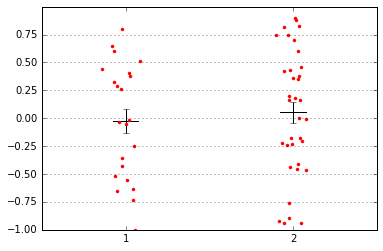

In [20]:
expt_positions = [1,2]

expt = [cdc24, bem]

expt_sem = [cdc24_sem, bem_sem]

fig = plt.figure()
ax = fig.gca()
whiskerprops = dict(linestyle='')
medianprops = dict(linestyle='')
meanlineprops = dict(linestyle='-', color='black')

expt_bp = plt.boxplot(expt, positions=expt_positions, showbox=False, showcaps=False, meanprops=meanlineprops, meanline=True, showmeans=True, medianprops=medianprops, showfliers=False, whiskerprops=whiskerprops)

for i, n in enumerate(expt_positions):
    y = expt[i]
    #print y
    x = np.random.normal(n, 0.04, len(y))
    plt.plot(x, y, color='r', marker='.', linestyle='')
    
plt.errorbar(expt_positions, [cdc24_ave, bem_ave], yerr=expt_sem, fmt=None, ecolor='k')
    
plt.xlim(0.5,2.5)
plt.ylim(-1,1)
ax.set_yticks(np.arange(-1.0,1,0.25))
plt.rc('grid', linestyle=":", color='black')
ax.yaxis.grid()

save_to = "/Users/Kristen/Desktop/06042017/Cdc24_Bem1_Polarization_Efficiency.pdf"
plt.savefig(save_to)

plt.show()